In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import RandomizedSearchCV, train_test_split

from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [3]:
df=pd.read_csv('data/stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
x=df.drop(columns=['math_score'],axis=1)

In [10]:
x.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [11]:
y=df['math_score']

In [12]:
num_feacture=x.select_dtypes(exclude="object").columns
cat_feature=x.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("onehotencoder", oh_transformer, cat_feature),
        ("standardscaler", numeric_transformer, num_feacture)
    ]
)

In [13]:
x=preprocessor.fit_transform(x)


In [14]:
x

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]], shape=(1000, 19))

In [15]:
x.shape

(1000, 19)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800, 19), (200, 19), (800,), (200,))

In [17]:
def evaluate_model(true,predicted):
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)
    mae = mean_absolute_error(true, predicted)

    print(f"RMSE: {rmse}")
    print(f"R2 Score: {r2}")
    print(f"MAE: {mae}")

    return rmse, r2, mae

In [39]:
models={
    "KNeighborsRegressor": KNeighborsRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "AdaBoostRegressor": AdaBoostRegressor(),
    "SVR": SVR(),
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "CatBoostRegressor": CatBoostRegressor(verbose=0),
    "XGBRegressor": XGBRegressor(eval_metric='rmse')
}
model_list=[]
r2_list=[]

for i in range (len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train, y_train)

    y_pred=model.predict(x_test)
    y_test_pred=model.predict(x_train)

    model_train_rmse, model_train_r2,model_train_mae = evaluate_model(y_train, y_test_pred)
    model_test_rmse, model_test_r2,model_test_mae = evaluate_model(y_test, y_pred)

    print(f"{list(models.keys())[i]} ")
    model_list.append(list(models.keys())[i])
    r2_list.append(model_test_r2)

    print("model performance for traning set")
    print(f"MAE: {model_train_mae}, RMSE: {model_train_rmse}, R2: {model_train_r2}")
    print("model performance for test set")
    print(f"MAE: {model_test_mae}, RMSE: {model_test_rmse}, R2: {model_test_r2}")
    print("--------------------------------------------------")

RMSE: 5.707683417990174
R2 Score: 0.8554978341651085
MAE: 4.516749999999999
RMSE: 7.253040741647602
R2 Score: 0.7838129945787431
MAE: 5.621
KNeighborsRegressor 
model performance for traning set
MAE: 4.516749999999999, RMSE: 5.707683417990174, R2: 0.8554978341651085
model performance for test set
MAE: 5.621, RMSE: 7.253040741647602, R2: 0.7838129945787431
--------------------------------------------------
RMSE: 0.2795084971874737
R2 Score: 0.9996534669718089
MAE: 0.01875
RMSE: 7.919595949289333
R2 Score: 0.7422519421513415
MAE: 6.25
DecisionTreeRegressor 
model performance for traning set
MAE: 0.01875, RMSE: 0.2795084971874737, R2: 0.9996534669718089
model performance for test set
MAE: 6.25, RMSE: 7.919595949289333, R2: 0.7422519421513415
--------------------------------------------------
RMSE: 2.311671542066311
R2 Score: 0.9762968067877205
MAE: 1.8446239583333335
RMSE: 6.0187448908222825
R2 Score: 0.8511320446719494
MAE: 4.6816
RandomForestRegressor 
model performance for traning set


In [40]:
pd.DataFrame(zip(model_list, r2_list), columns=['Model', 'R2 Score']).sort_values(by='R2 Score', ascending=False)


,Model,R2 Score
7,Ridge,0.880593
5,LinearRegression,0.880433
3,AdaBoostRegressor,0.857331
8,CatBoostRegressor,0.851632
2,RandomForestRegressor,0.851132
9,XGBRegressor,0.827797
6,Lasso,0.825320
0,KNeighborsRegressor,0.783813
1,DecisionTreeRegressor,0.742252
4,SVR,0.728600


In [41]:
lin_model=LinearRegression(fit_intercept=True)
lin_model.fit(x_train, y_train)
y_pred=lin_model.predict(x_test)
score=r2_score(y_test, y_pred)*100
print(f"Linear Regression R2 Score: {score}")


Linear Regression R2 Score: 88.04332983749565


Text(0, 0.5, 'Predicted Values')

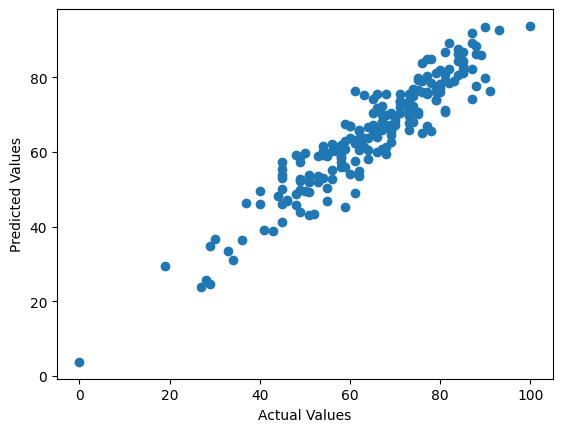

In [42]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

<Axes: xlabel='math_score'>

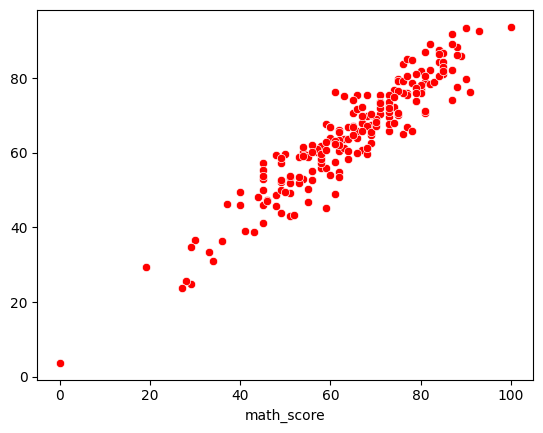

In [48]:
sns.scatterplot(x=y_test, y=y_pred,color='red')

In [50]:
pred_df=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred,'Difference': y_test-y_pred})
pred_df

,Actual,Predicted,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
